# Try PCA, Correlation and K Best

## Imports

In [50]:
import pandas as pd
import pickle
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
import seaborn as sns

## Pull in training data

In [36]:
with open('../../02_Data/02_Processed_Data/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
    
with open('../../02_Data/02_Processed_Data/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)    

with open('../../02_Data/02_Processed_Data/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
    
with open('../../02_Data/02_Processed_Data/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)    

## PCA on X_train

<Container object of 11 artists>

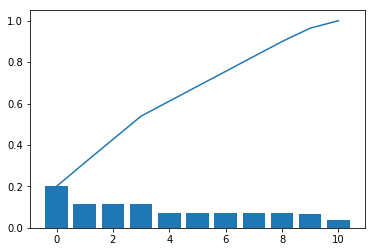

In [75]:
components = 11
pca_r = PCA(n_components=components)
X_train_pca = pca_r.fit_transform(X_train)

plt.plot(np.cumsum(pca_r.explained_variance_ratio_))
plt.bar(range(components),pca_r.explained_variance_ratio_)

In [80]:
components_loading_mat = pd.DataFrame(pca_r.components_, columns=X_train.columns, index=[f'component_{x}' for x in range(pca_r.components_.shape[0])]).T

In [85]:
for col in components_loading_mat.columns:
    components_loading_mat[f'{col}_abs'] = components_loading_mat[col].map(abs)

In [89]:
components_loading_mat.sort_values('component_2_abs', ascending=False)['component_2']

clinch_head_strikes_percent_diff_avg_diff          -9.999827e-01
grappling_takedowns_percent_diff_avg_diff          -5.878809e-03
clinch_total_strikes_percent_diff_avg_diff         -2.145452e-13
clinch_significant_strikes_percent_diff_avg_diff    1.990689e-13
f1_f1_distance_strikes_attempts_avg                -5.616833e-15
f2_f1_distance_strikes_attempts_avg                 5.616833e-15
f1_f1_significant_strikes_attempts_avg             -5.384218e-15
f2_f1_significant_strikes_attempts_avg              5.384218e-15
clinch_body_strikes_percent_diff_avg_diff          -5.088903e-15
f1_f1_distance_head_strikes_attempts_avg           -4.499821e-15
f2_f1_distance_head_strikes_attempts_avg            4.499821e-15
f1_f1_head_significant_strikes_attempts_avg        -4.076539e-15
f2_f1_head_significant_strikes_attempts_avg         4.076539e-15
f2_f1_ground_total_strikes_attempts_avg            -4.071025e-15
f1_f1_ground_total_strikes_attempts_avg             4.071025e-15
f1_f2_significant_strikes

## PCA on full train set

In [38]:
train = pd.read_csv('../../02_Data/02_Processed_Data/train_2.csv',index_col=0)
# train = train.drop(columns=['f1_outcome', 'outcome'])

<Container object of 15 artists>

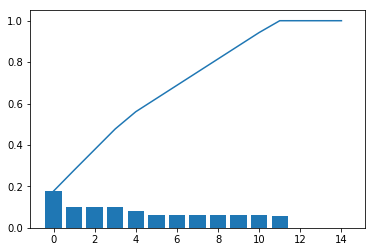

In [39]:
components = 15
pca_r = PCA(n_components=components)
train_pca = pca_r.fit_transform(train.select_dtypes(exclude='object'))

plt.plot(np.cumsum(pca_r.explained_variance_ratio_))
plt.bar(range(components),pca_r.explained_variance_ratio_)

## Try Correlation

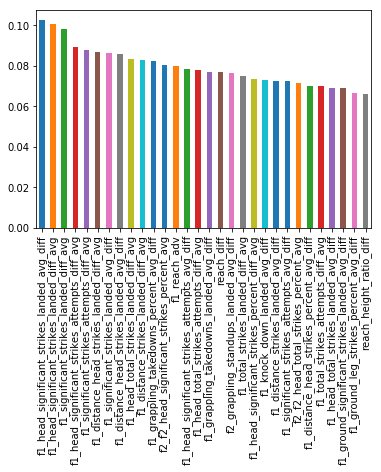

In [49]:
outcome_corrs = train.corr()['outcome'].sort_values(ascending=False)[1:]
outcome_corrs[:30].plot('bar')

TypeError: 'AxesSubplot' object does not support indexing

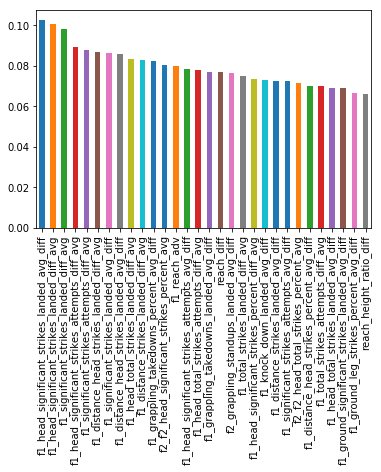

In [52]:
sns.barplot(data = outcome_corrs[:30].plot('bar'))

In [53]:
outcome_corrs[:30]

f1_head_significant_strikes_landed_avg_diff      0.102268
f1_head_significant_strikes_landed_diff_avg      0.100631
f1_significant_strikes_landed_diff_avg           0.097893
f1_head_significant_strikes_attempts_diff_avg    0.089166
f1_significant_strikes_attempts_diff_avg         0.087671
f1_distance_head_strikes_landed_diff_avg         0.086713
f1_significant_strikes_landed_avg_diff           0.086064
f1_distance_head_strikes_landed_avg_diff         0.085682
f1_head_total_strikes_landed_diff_avg            0.083139
f1_distance_strikes_landed_diff_avg              0.082549
f1_grappling_takedowns_percent_avg_diff          0.082267
f2_f2_head_significant_strikes_percent_avg       0.080305
f1_reach_adv                                     0.079662
f1_head_significant_strikes_attempts_avg_diff    0.078433
f1_head_total_strikes_attempts_diff_avg          0.078020
f1_grappling_takedowns_landed_avg_diff           0.076843
reach_diff                                       0.076601
f2_grappling_s

## Try K Best

In [70]:

selector = SelectKBest(k=15)
selector.fit(X_train, y_train)
col_mask = selector.get_support(indices=False)
# Create new dataframe with only desired columns, or overwrite existing
X_train.loc[:,col_mask].columns


Index(['f1_head_significant_strikes_landed_diff_avg',
       'f1_head_significant_strikes_attempts_diff_avg',
       'f1_significant_strikes_attempts_diff_avg',
       'f1_significant_strikes_landed_diff_avg',
       'f2_head_significant_strikes_landed_diff_avg',
       'f2_head_significant_strikes_attempts_diff_avg',
       'f2_significant_strikes_attempts_diff_avg',
       'f2_significant_strikes_landed_diff_avg',
       'f1_distance_head_strikes_landed_avg_diff',
       'f1_grappling_takedowns_landed_avg_diff',
       'f1_head_significant_strikes_landed_avg_diff',
       'f1_grappling_takedowns_percent_avg_diff',
       'f2_head_total_strikes_percent_avg_diff',
       'f2_head_significant_strikes_percent_avg_diff', 'f1_reach_adv'],
      dtype='object')

## TODO Next:
- Try first select K best then PCA
- Then put results of K Best into model
- 